![ADSA Logo](http://i.imgur.com/BV0CdHZ.png?2 "ADSA Logo")

# Spring 2019 ADSA Workshop - Introduction to Machine Learning
Workshop content adapted from:
* [Introduction to Machine Learning with Python](https://github.com/amueller/introduction_to_ml_with_python)
* [info490-sp17](https://github.com/lcdm-uiuc/info490-sp17/tree/d91b9099c5c26722d56fd3dbffbca13a6f72b6d2/notebooks)
***

This workshop will be focusing on the following topics
    - Review on previous workshops
        * Numpy
        * Scipy
        * Matplotlib
        * Pandas
    - Analyzing the data
    - Training and testing data
    - Visualizing the data
    - K-Nearest Neighbors
    - Decision Trees 
    - Naive Bayes

## Introduction
### What is machine learning?
    - Machine learning is an application of artificial intelligence (AI) that provides systems
      the ability to automatically learn and improve from experience without being explicitly programmed.
### Problems that machine learning can solve
    - Self-driving cars 
    - Facial Recognition
    - Recommenders

### Types of learning
Depending on the data available to your learning system, machine learning tasks are divided into broad areas
    - Supervised Learning - learning that takes place when the training data are labelled with the correct outcome, which gives the learning algorithm examples for learning.
    - Unsupervised Learning - learning that takes place by grouping similar inputs X into clusters

##### NumPy

In [45]:
import numpy as np

x = np.array([[1, 2, 3], [4, 5, 6]])
print("x:\n{}".format(x))

x:
[[1 2 3]
 [4 5 6]]


##### matplotlib

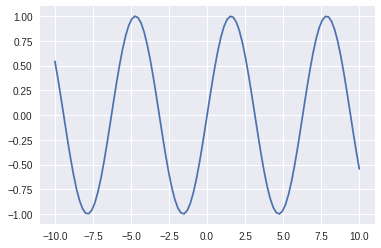

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt

# Generate a sequence numbers from -10 to 10 with 100 steps in between
x = np.linspace(-10, 10, 100)
# create a second array using sinus
y = np.sin(x)
# The plot function makes a line chart of one array against another
plt.plot(x, y, marker="x")

##### pandas

In [47]:
import pandas as pd
from IPython.display import display

# create a simple dataset of people
data = {'Name': ["John", "Anna", "Peter", "Linda"],
        'Location' : ["New York", "Paris", "Berlin", "London"],
        'Age' : [24, 13, 53, 33]
       }

data_pandas = pd.DataFrame(data)
# IPython.display allows "pretty printing" of dataframes
# in the Jupyter notebook
display(data_pandas)

,Age,Location,Name
0,24,New York,John
1,13,Paris,Anna
2,53,Berlin,Peter
3,33,London,Linda


In [48]:
# One of many possible ways to query the table:
# selecting all rows that have an age column greate than 30
display(data_pandas[data_pandas.Age > 30])

,Age,Location,Name
2,53,Berlin,Peter
3,33,London,Linda


### A First Application: Classifying iris species
![sepal_petal](https://raw.githubusercontent.com/amueller/introduction_to_ml_with_python/cccbbca86d00f9d5ffb643c740de4489de80436d/images/iris_petal_sepal.png)

#### Meet the data

In [0]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [50]:
print("Keys of iris_dataset: {}".format(iris_dataset.keys()))

Keys of iris_dataset: dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [51]:
print(iris_dataset['DESCR'][:193] + "\n...")

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive att
...


In [52]:
print("Target names: {}".format(iris_dataset['target_names']))

Target names: ['setosa' 'versicolor' 'virginica']


In [53]:
print("Feature names: {}".format(iris_dataset['feature_names']))

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [54]:
print("Type of data: {}".format(type(iris_dataset['data'])))

Type of data: <class 'numpy.ndarray'>


In [55]:
print("Shape of data: {}".format(iris_dataset['data'].shape))

Shape of data: (150, 4)


In [56]:
print("First five rows of data:\n{}".format(iris_dataset['data'][:5]))

First five rows of data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [57]:
print("Type of target: {}".format(type(iris_dataset['target'])))

Type of target: <class 'numpy.ndarray'>


In [58]:
print("Shape of target: {}".format(iris_dataset['target'].shape))

Shape of target: (150,)


In [59]:
print("Target:\n{}".format(iris_dataset['target']))

Target:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


#### Measuring Success: Training and testing data

In [0]:
from sklearn.model_selection import train_test_split

More information on this function on 
[train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

### Why do we need to split the data into training and testing data? 
In machine learning, we generalize patterns beyond the data used to train models. Because we do not know the target values, we can not check the accuracy of our predictions in the future. Therefore, we can use a portion of training data to test our model. 

In [0]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0, test_size = 0.8)

In [62]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

X_train shape: (30, 4)
y_train shape: (30,)


In [63]:
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_test shape: (120, 4)
y_test shape: (120,)


#### First things first: Look at your data

In [64]:
# create dataframe from data in X_train
# label the columns using the strings in iris_dataset.feature_names
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
print(iris_dataframe)

    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                 5.8               4.0                1.2               0.2
1                 7.7               2.8                6.7               2.0
2                 5.1               3.8                1.5               0.3
3                 4.7               3.2                1.6               0.2
4                 7.4               2.8                6.1               1.9
5                 5.0               3.3                1.4               0.2
6                 6.3               3.4                5.6               2.4
7                 5.7               2.8                4.1               1.3
8                 5.8               2.7                3.9               1.2
9                 5.7               2.6                3.5               1.0
10                6.4               3.2                5.3               2.3
11                6.7               3.0                5.2               2.3

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9d31aa3978>,
      dtype=object)

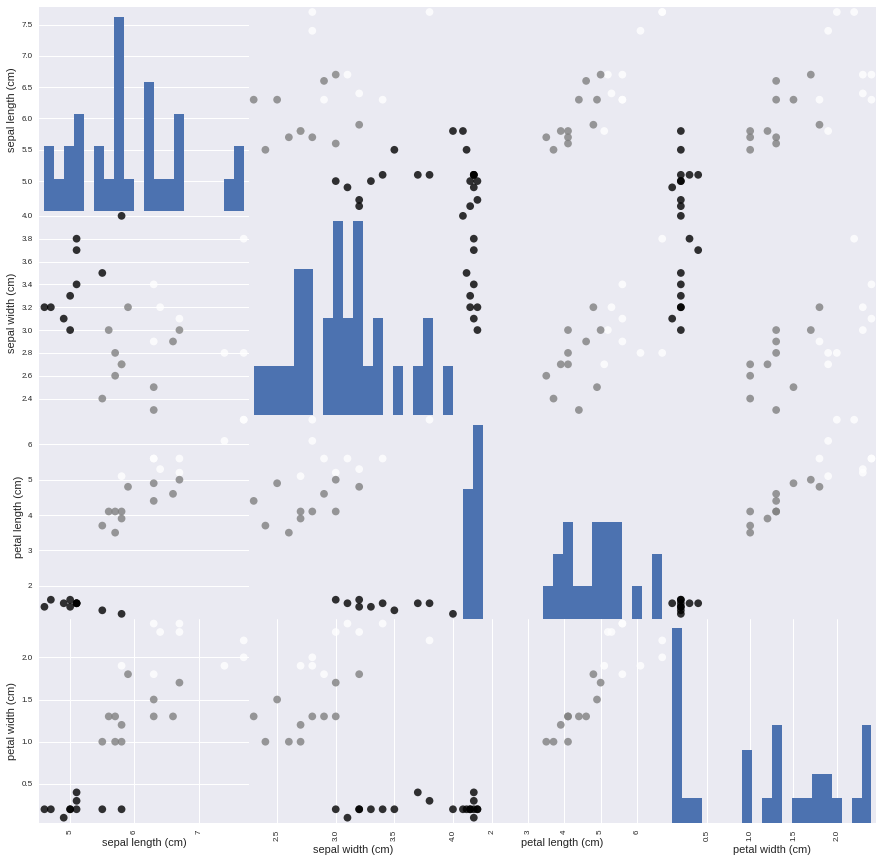

In [65]:
# create a scatter matrix from the dataframe, color by y_train
pd.scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15), marker='o',
                           hist_kwds={'bins': 20}, s=60, alpha=.8)

#### Building your first model: k nearest neighbors

-----

## [k-Nearest Neighbors][knn] (K-NN)

The first algorithm we will explore is one of the simplest, the
[k-nearest neighbor][knn] algorithm. Fundamentally, this algorithm is
remarkable simple and is based on the principle that data values in an
$N$- dimensional space are generally located near other similar objects.
The number of nearest neighbors, k, is a tuning parameter, and can be
specified a priori or in some algorithms empirically determined. The
basic principle behind k-nn is demonstrated in the following figure from
Wikipedia:

![knn Image from Wikipedia][knni]

As shown in the image, when a new datum is added, the classification
must be assigned. In the case of k-nn, this is done by looking at the
nearest neighbors and using some statistical evaluation of their
classes. For example, we could use some weighted combination of the
nearest neighbors, where the weight might be determined by the relative
distance of each neighbor from the datum of interest. 

In the following code cells, we demonstrate how to perform knn
classification by using scikit-learn. In this example, we use five
nearest neighbors (but this value can be easily adjusted to see how the
classification performance changes). The standard classification
process in scikit-learn is to first fit a model to the training data
and to subsequently apply this model to predict values for the testing
data. After this process, we first compute the prediction score before
displaying the confusion matrix for this algorithm.

-----

[knn]: https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm
[knni]: https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/KnnClassification.svg/500px-KnnClassification.svg.png

In [0]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [67]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

#### Making predictions

In [68]:
X_new = np.array([[5, 2.9, 1, 0.2]])
print("X_new.shape: {}".format(X_new.shape))

X_new.shape: (1, 4)


In [69]:
prediction = knn.predict(X_new)
print("Prediction: {}".format(prediction))
print("Predicted target name: {}".format(
       iris_dataset['target_names'][prediction]))

Prediction: [0]
Predicted target name: ['setosa']


#### Evaluating the model

In [70]:
y_pred = knn.predict(X_test)
print("Test set predictions:\n {}".format(y_pred))

Test set predictions:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 1 0 0 1 1 0 2 1 0 1 2 1 0
 2 1 1 2 0 2 0 0 1 2 2 1 2 1 2 1 1 1 1 1 1 1 2 1 0 2 1 1 1 1 2 0 0 2 1 0 0
 1 0 2 1 0 1 2 1 0 2 2 2 2 0 0 2 2 0 2 0 2 2 0 0 2 0 0 0 1 2 2 0 0 0 1 1 0
 0 1 0 2 1 2 1 0 1]


In [71]:
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))

Test set score: 0.93


In [72]:
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.93


### Summary and Outlook

In [73]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.97


## Decision Trees

Decision trees are one of the few models that allow users to interpret exactly why the classifier makes a decision. Under the hood, the decision tree classifer asks a series of yes or no questions. Based on the answers, the classifier will return its decision.

### Split

In [0]:
x_train, x_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)

### Create classifier

In [0]:
from sklearn import tree

In [0]:
clf = tree.DecisionTreeClassifier()

### Train with data

In [0]:
clf = clf.fit(x_train, y_train)

### Score

In [78]:
clf.score(x_test, y_test)

0.9736842105263158

### Predict

In [79]:
X_new = np.array([[5, 2.9, 1, 0.2]])
prediction = clf.predict(X_new)
print("Prediction: {}".format(prediction))
print("Predicted target name: {}".format(
       iris_dataset['target_names'][prediction]))

Prediction: [0]
Predicted target name: ['setosa']


## Excercise: Wine dataset

In [0]:
from sklearn.datasets import load_wine

In [0]:
wine_dataset = load_wine()

In [0]:
# split the data using the train_test_split
wine_x_train, wine_x_test, wine_y_train, wine_y_test = train_test_split(
    wine_dataset['data'], wine_dataset['target'], random_state=0)

In [0]:
# create the decision tree classifier
wine_clf = tree.DecisionTreeClassifier()

In [0]:
# train the data using the wine dataset
wine_clf = wine_clf.fit(wine_x_train, wine_y_train)

In [0]:
# predict the class of a wine_new
wine_new = np.array([[1.6, 5.1, 3.1, 2.20, 8.8, 1.5, 0.047, 0.052, 1.15, 6.62, 0.07, 1.75,52.0]])
prediction = wine_clf.predict(wine_new)
print("Prediction: {}".format(prediction))
print("Predicted target name: {}".format(
       wine_dataset['target_names'][prediction]))

Prediction: [2]
Predicted target name: ['class_2']


In [0]:
# get the score of the decision tree model
wine_clf.score(wine_x_test, wine_y_test)

0.9333333333333333

## [Naive Bayes][nb] 

The first algorithm we will explore is one of the simplest, the [Naive
Bayes][nb] algorithm. Fundamentally, this algorithm is remarkably simple
and is based on the assumption of independence that a given attribute (or
feature) belongs to a specific class. Scikit learn provides several
Naive Bayes implementations, using a specific one generally depends on
the nature of the data being analyzed:

- [Gaussian Naive Bayes][gnb] 
- [Multinomial Naive Bayes][mnb] 
- [Bernoulli Naive Bayes][bnb] 

In the following code cells, we demonstrate how to perform Naive Bayes
classification by using scikit learn, in this case we use the Gaussian
Naive Bayes implementation. The standard classification process in
scikit learn is to first fit a model to the training data and to
subsequently apply this model to predict values for the testing data.
After this process, we first compute the prediction score before
displaying the confusion matrix for this algorithm.

-----
[gnb]: http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB
[mnb]: http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB
[bnb]: http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html#sklearn.naive_bayes.BernoulliNB
[nb]: https://en.wikipedia.org/wiki/Naive_Bayes_classifier

In [0]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# We do this to ignore several specific Pandas warnings
import warnings

## Handwritten Digits

We will explore the Naive Bayes
classification applied to handwritten digits. First we will load the
data and review some of the sample. After which, we will apply a
Multinomial Naive Bayes classification to this data and explore the
resulting predictions.

-----

In [0]:
# We have helper code to assist in the loading and plotting of these data

# Get the digit data, and return the data as x, y and images in case 
# we want to show them.

import sklearn.datasets as ds

def get_data():
    # Load the digit data
    digits = ds.load_digits()
    
    x = digits.data
    y = digits.target
    
    i = digits.images
    
    return (x, y, i)

def im_plot(x, y, images):
    
    # First we build an array of the indicaes contianing the first ten images for each digit.
    vals = np.where(y == 0)[0][:10]
    
    for i in range(1, 10):
        vals = np.vstack((vals, np.where(y == i)[0][:10]))
        
    nrows, ncols = vals.shape
    
    plt.figure(figsize=(8.5,8))
    plt.gray()

    # Build a list of the indices in the order I want.
    # plot them, one by one.

    for idx, i in enumerate(vals.T.ravel()):
        ax = plt.subplot(nrows, ncols, idx + 1)
        
        # We want square images
        ax.set_aspect('equal')
        
        # Now show the images, by default pixels are shown as white on black.
        # To show black on white, reverse colormap: cmap=plt.cm.gray_r
        # To smooth pixelated images: interpolation='nearest'
        ax.imshow(images[i])
        
        # No tick marks for small plots
        plt.xticks([]) ; plt.yticks([])
        
        # Only put plot lables over columns
        if idx < 10:
            plt.title(y[i])

def make_ones():
    ones = np.zeros((6, 64))

    for idx in range(6):
        one = np.zeros((8, 8))
        one[1:-1, idx + 1] = 16
    
        ones[idx] = one.ravel()
        
    return(ones)

def make_sevens():
    sevens = np.zeros((3, 64))

    for idx in range(3):
        seven = np.zeros((8, 8))
        seven[1:-1, idx + 4] = 16
        seven[1,idx + 1: idx + 5] = 16
    
        sevens[idx] = seven.ravel()
  
    return(sevens)
    
def make_fakes():
    fakes = np.zeros((16, 64))
    
    for idx in range(fakes.shape[0]):
        fake = np.zeros((8, 8))    
        fakes[idx] = fake.ravel()

    bar = np.zeros((8, 8)) 
    bar[:,0] = 16
    fakes[0] = bar.ravel()
    fakes[1] = np.rot90(bar, 1).ravel()
    fakes[2] = np.rot90(bar, 2).ravel()
    fakes[3] = np.rot90(bar, 3).ravel()

    ell = bar + np.rot90(bar, 1)
    ell[ell > 16] = 16

    fakes[4] = ell.ravel()
    fakes[5] = np.rot90(ell, 1).ravel()
    fakes[6] = np.rot90(ell, 2).ravel()
    fakes[7] = np.rot90(ell, 3).ravel()

    you = ell + np.rot90(bar, 1) + np.rot90(bar, 3)
    you[you > 16] = 16

    fakes[8] = you.ravel()
    fakes[9] = np.rot90(you, 1).ravel()
    fakes[10] = np.rot90(you, 2).ravel()
    fakes[11] = np.rot90(you, 3).ravel()

    atee = bar + np.roll(np.rot90(bar, 1), 4, axis=0)
    atee[atee > 16] = 16

    fakes[12] = atee.ravel()
    fakes[13] = np.rot90(atee, 1).ravel()
    fakes[14] = np.rot90(atee, 2).ravel()
    fakes[15] = np.rot90(atee, 3).ravel()
    
    return(fakes)
    
# Simple function to plot images of different numbers in a row
def plot_numbers(numbers):

    size = len(numbers)
    plt.figure(figsize=(size,1))
    plt.gray()

    for idx, i in enumerate(numbers):
        ax = plt.subplot(1, size, idx + 1)
        
        # We want square images
        ax.set_aspect('equal')
        
        # Now show the images, by default pixels are shown as white on black.
        # To show black on white, reverse colormap: cmap=plt.cm.gray_r
        # To smooth pixelated images: interpolation='nearest'
        ax.imshow(numbers[idx].reshape(8,8))
        
        # No tick marks for small plots
        plt.xticks([]) ; plt.yticks([])

Total number of samples = 1797


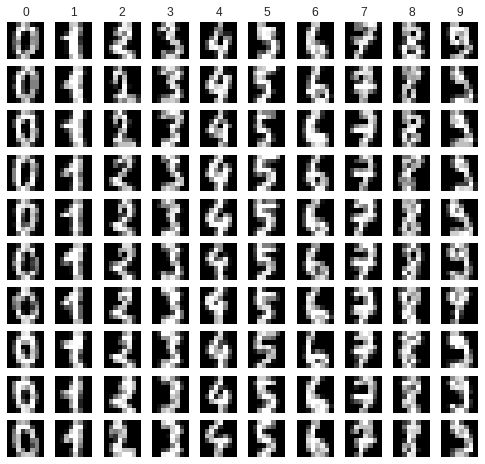

In [82]:
# We extract features (x), labels (y), and the images for plotting.
x, y, images = get_data()
im_plot(x, y, images)

print('Total number of samples = {0}'.format(x.shape[0]))

-----

### Classification of Image Data

Now that these data are loaded, we can apply a Naives Bayes classifier
to this problem. Below we employ a Multinomial Naive Bayes model, and
show the classification score, and the classification report.

-----

In [83]:
import sklearn.cross_validation as cv
(x_train, x_test, y_train, y_test) = cv.train_test_split(x, y, test_size=.25)

# First, lets try Gaussain NB
from sklearn.naive_bayes import MultinomialNB

# First we construct our Classification Model
nbc = MultinomialNB()

nbc.fit(x_train, y_train);

print('Prediction Accuracy = {0:3.1f}%'.format(100*nbc.score(x_test, y_test)))

Prediction Accuracy = 90.7%


In [84]:
# more information on the precision, recall, f1-score, and support is found here: 
# http://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html

from sklearn.metrics import classification_report

y_pred = nbc.predict(x_test)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        42
          1       0.88      0.59      0.71        39
          2       0.88      0.93      0.90        40
          3       1.00      0.86      0.93        44
          4       1.00      0.96      0.98        46
          5       0.93      0.87      0.90        46
          6       0.98      0.95      0.96        42
          7       0.92      1.00      0.96        54
          8       0.80      0.92      0.86        53
          9       0.76      0.93      0.84        44

avg / total       0.91      0.91      0.91       450



-----

### Model Evaluation

The Naive Bayes model performed in a reasonable manner, but what about
on completely blind data. We can test the model by _making_ new data.
Below we use methods in the helper code to make _fake_ data, in this
case images of **one** and **seven**. We display the _fake_ images, and
then the results of our model classifying these new data.

-----

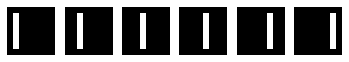

In [85]:
ones = make_ones()
plot_numbers(ones)

In [86]:
print('Actual : Predicted')
for one in ones:
    print('  1    :     {0}'.format(nbc.predict([one])[0])) # You can use "one" instead of "[one]"
                                                            # But it's depreciated in newer versions of sklearn

Actual : Predicted
  1    :     0
  1    :     0
  1    :     1
  1    :     1
  1    :     9
  1    :     9


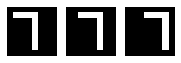

In [87]:
# Now test on our sevens
sevens = make_sevens()
plot_numbers(sevens)

In [88]:
print('Actual : Predicted')
for seven in sevens:
    print('  7    :     {0}'.format(nbc.predict([seven])[0]))

Actual : Predicted
  7    :     2
  7    :     0
  7    :     9
